In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [7]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

'\nfor cl in classes:\n  img_path = os.path.join(base_dir, cl)\n  images = glob.glob(img_path + \'/*.jpg\')\n  print("{}: {} Images".format(cl, len(images)))\n  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]\n\n  for t in train:\n    if not os.path.exists(os.path.join(base_dir, \'train\', cl)):\n      os.makedirs(os.path.join(base_dir, \'train\', cl))\n    shutil.move(t, os.path.join(base_dir, \'train\', cl))\n\n  for v in val:\n    if not os.path.exists(os.path.join(base_dir, \'val\', cl)):\n      os.makedirs(os.path.join(base_dir, \'val\', cl))\n    shutil.move(v, os.path.join(base_dir, \'val\', cl))\n'

In [8]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [9]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [10]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE)
)

Found 2935 images belonging to 5 classes.


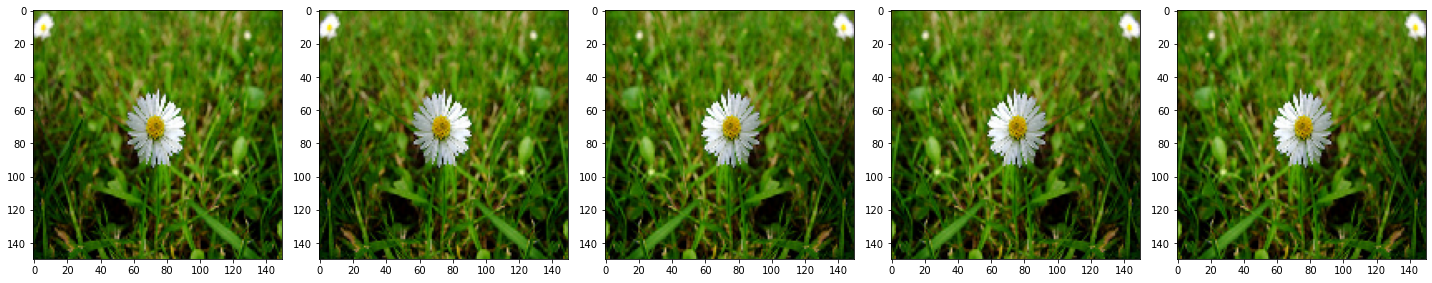

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15
)

train_data_gen = image_gen_train.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    shuffle=True,
    class_mode='sparse'
)

Found 2935 images belonging to 5 classes.


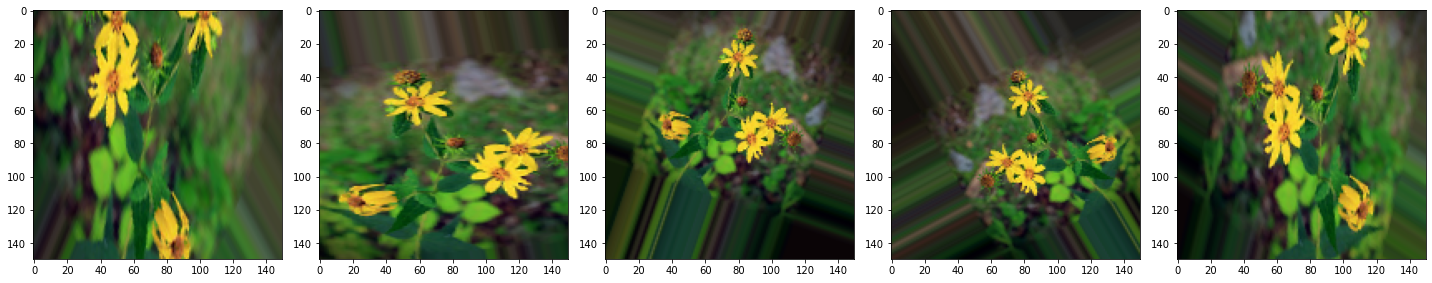

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen_val = ImageDataGenerator(
    rescale=1./255
)
val_data_gen = image_gen_val.flow_from_directory(
    val_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    shuffle=False,
    class_mode='sparse'
)

Found 735 images belonging to 5 classes.


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dropout(0.2),   
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)

])

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [21]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

c:\Users\tuest\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
30/30 [==============================] - 113s 4s/step - loss: 1.5189 - accuracy: 0.3646 - val_loss: 1.3689 - val_accuracy: 0.5265
Epoch 2/80
30/30 [==============================] - 83s 3s/step - loss: 1.4135 - accuracy: 0.4739 - val_loss: 1.3583 - val_accuracy: 0.5524
Epoch 3/80
30/30 [==============================] - 74s 2s/step - loss: 1.3741 - accuracy: 0.5210 - val_loss: 1.3290 - val_accuracy: 0.5714
Epoch 4/80
30/30 [==============================] - 79s 3s/step - loss: 1.3625 - accuracy: 0.5322 - val_loss: 1.2830 - val_accuracy: 0.6150
Epoch 5/80
30/30 [==============================] - 70s 2s/step - loss: 1.3282 - accuracy: 0.5785 - val_loss: 1.3115 - val_accuracy: 0.5850
Epoch 6/80
30/30 [==============================] - 60s 2s/step - loss: 1.3292 - accuracy: 0.5751 - val_loss: 1.2670 - val_accuracy: 0.6354
Epoch 7/80
30/30 [==============================] - 58s 2s/step - loss: 1.2917 - accuracy: 0.6048 - val_loss: 1.2523 - val_accuracy: 0.6476
Epoch 8/80
30/30 [=

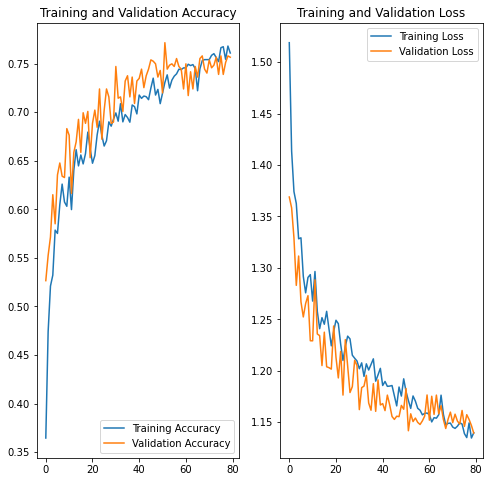

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()